<a href="https://colab.research.google.com/github/sanjeevm4788/Face-emotion-detection/blob/main/Face_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEPFACE

In [3]:
!pip install deepface matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.6/7.6 MB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 kB ? eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 1.0/1.0 MB 32.2 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)


In [4]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [7]:
# neutral=cv2.imread("neutral.jpg")
happy=cv2.imread("happyface.jpg")
# plt.imshow(neutral)

In [41]:
happy.shape

(222, 218, 3)

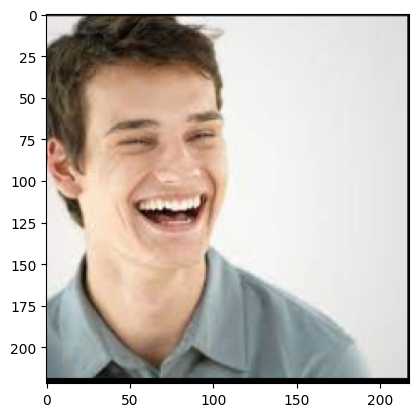

In [8]:
plt.imshow(happy)

DEEP LEARNING MODEL

In [32]:
def deep(image):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #Detecting the faces
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:

        #Drawing rectangle over the face area
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
        face = image[y:y + h, x:x + w]

        #predicting the emotion with deepface
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        font = cv2.FONT_HERSHEY_SIMPLEX
        display(result)
        print(result[0]['dominant_emotion'])
        cv2.putText(image, result[0]['dominant_emotion'], (x,y), font, 1, (0,0,225), 2, cv2.LINE_4)
    
        #Storing the image from gray to coloured
        coloured_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     
    #Displaying image with it's corresponding emotion 
    return plt.imshow(coloured_img) 

Action: emotion: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.24it/s]


[{'emotion': {'angry': 1.4748499110586118e-23,
   'disgust': 0.0,
   'fear': 8.425680809849742e-25,
   'happy': 100.0,
   'sad': 5.989416906072572e-19,
   'surprise': 1.5104103523455592e-07,
   'neutral': 6.102399401769487e-12},
  'dominant_emotion': 'happy',
  'region': {'x': 0, 'y': 0, 'w': 115, 'h': 115}}]

happy


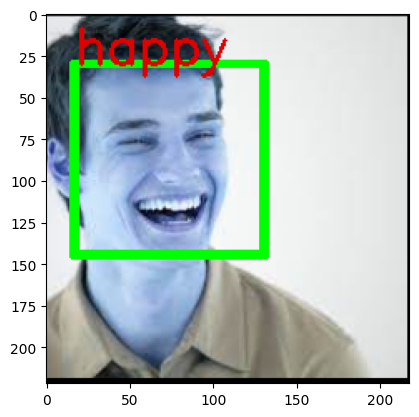

In [33]:
deep(happy)

In [11]:
# deep(neutral)

In [34]:
from tensorflow.keras.models import load_model
import numpy as np

In [38]:
happy1=cv2.imread("happyface.jpg")

In [42]:
#loading the pre-trained model file
model = load_model('final_model.h5')

def dl_model(image):

    #Labels for the emotions
    class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    print(gray.shape)

    #Detecting the faces
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:

        #Drawing rectangle over the face area
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
        face = gray[y:y + h, x:x + w]
        face = cv2.resize(face,(48,48))
        face = np.expand_dims(face,axis=0)
        face = face/255.0
        face = face.reshape(face.shape[0],48,48,1)

        #Predicting the emotion with the pre-trained model
        preds = model.predict(face)[0]
        label = class_labels[preds.argmax()]
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, label, (x,y), font, 1, (0,0,225), 2, cv2.LINE_4)

        #Storing the image from gray to coloured
        coloured_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     
    #Displaying image with it's corresponding emotion 
    return plt.imshow(coloured_img)

(222, 218)
1/1 [==============================] - 0s 191ms/step


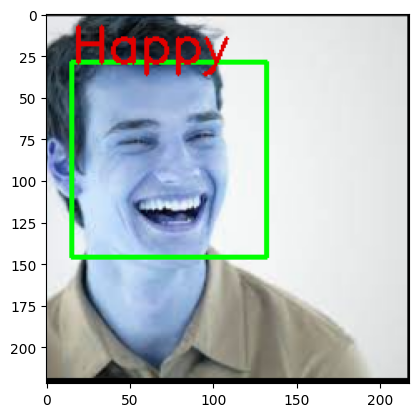

In [43]:
dl_model(happy1)